In [56]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../brasseries.csv")
print(df.shape)
df.head(5)

(420, 8)


,name,address,place_id,rating,reviews,price_level,website,arrondissement
0,Le Petit Bouillon Pharamond,"24 Rue de la Grande Truanderie, 75001 Paris, F...",ChIJRcSln6lv5kcRlLWcSVj4QGE,4.2,5331,2.0,http://www.petitbouillonpharamond.com/,1
1,Brasserie de la Bourse,"27 Rue Jean-Jacques Rousseau, 75001 Paris, France",ChIJLTXauyNu5kcRfE2jvCNL1Is,4.4,676,2.0,http://www.brasseriedelabourseparis.com/,1
2,Brasserie Flottes,"2 Rue Cambon, 75001 Paris, France",ChIJDeI4Jx9v5kcRItEpEe0E6jo,4.5,1454,2.0,http://brasserieflottes.fr/fr,1
3,Brasserie du Louvre - Bocuse,"Place André Malraux, Paris, Île-de-France, Fra...",ChIJUZFuuSVu5kcRfY5Fd2TUlRQ,4.1,656,3.0,https://www.hyattrestaurants.com/en/dining/fra...,1
4,Brasserie l'Émil,"55 Rue Saint-Roch, 75001 Paris, France",ChIJ_xOkpDpv5kcRk_YSe4UrbkI,4.3,142,NaN,https://www.chateauvoltaire.com/restaurant,1


In [4]:
columns_to_lower = ["name", "address"]
for col in columns_to_lower:
    df[col] = df[col].apply(lambda x: x.lower() if isinstance(x, str) else x)
df.head(1)

,name,address,place_id,rating,reviews,price_level,website,arrondissement
0,le petit bouillon pharamond,"24 rue de la grande truanderie, 75001 paris, f...",ChIJRcSln6lv5kcRlLWcSVj4QGE,4.2,5331,2.0,http://www.petitbouillonpharamond.com/,1


## How many locations have the name 'Bistrot' in them? 'Cafe'? 'Brasserie'?

In [39]:
count_bistrot = df['name'].str.contains("bistrot").value_counts().values[1]
print("Occurrences of 'bistrot':", count_bistrot)
count_cafe = df['name'].str.contains("cafe").value_counts().values[1]
print("Occurrences of 'cafe':", count_cafe)
count_brasserie = df['name'].str.contains("brasserie").value_counts().values[1]
print("Occurrences of 'brasserie':", count_brasserie)
count_bouillon = df['name'].str.contains("bouillon").value_counts().values[1]
print("Occurrences of 'bouillon':", count_bouillon)
count_restaurant = df['name'].str.contains("restaurant").value_counts().values[1]
print("Occurrences of 'restaurant':", count_restaurant)

Occurrences of 'bistrot': 27
Occurrences of 'cafe': 4
Occurrences of 'brasserie': 71
Occurrences of 'bouillon': 5
Occurrences of 'restaurant': 28


### Which street has the most locations?

In [44]:
def get_streetname(address):
    street = address.split(",")[0]
    street_name =  " ".join(street.split(" ")[1:])
    return street_name.strip()

In [45]:
df['street_name'] = df['address'].apply(get_streetname)

In [46]:
df.head(1)

,name,address,place_id,rating,reviews,price_level,website,arrondissement,street_name
0,le petit bouillon pharamond,"24 rue de la grande truanderie, 75001 paris, f...",ChIJRcSln6lv5kcRlLWcSVj4QGE,4.2,5331,2.0,http://www.petitbouillonpharamond.com/,1,rue de la grande truanderie


In [48]:
counts = df['street_name'].value_counts()
counts

street_name
av. daumesnil          8
bd saint-germain       7
rue saint-dominique    5
av. jean jaurès        5
rue didot              4
                      ..
rue de lisbonne        1
rue marbeuf            1
intérieure             1
pl. des ternes         1
rue lamartine          1
Name: count, Length: 309, dtype: int64

## Reviews | rating ratios

Text(0.5, 1.0, 'Distribution of rating')

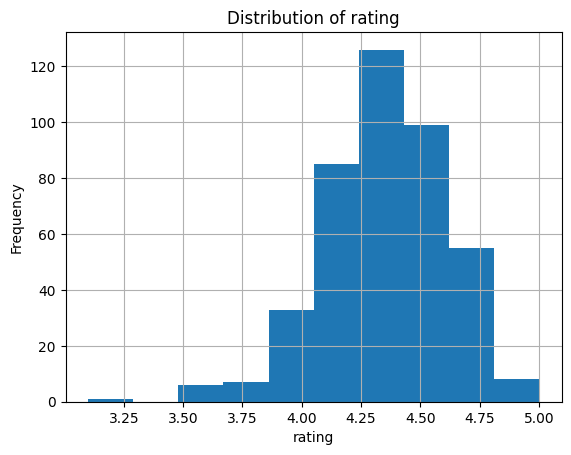

In [62]:
df['rating'].hist()
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Distribution of rating')

<Axes: >

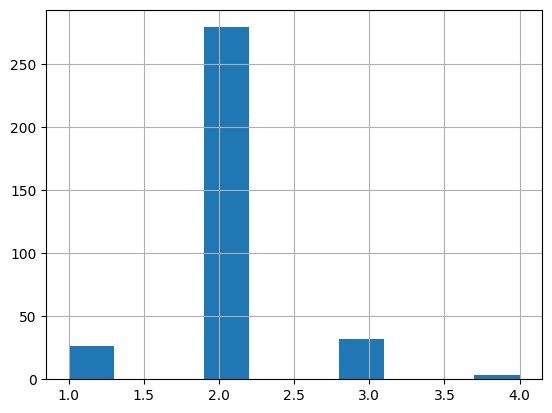

In [64]:
df['price_level'].hist()

In [65]:
df['arrondissement'].value_counts()

arrondissement
1     40
2     21
10    21
4     20
13    20
5     20
7     20
6     20
8     20
9     20
11    20
12    20
17    20
14    20
15    20
16    20
20    20
19    20
3     19
18    19
Name: count, dtype: int64

In [67]:
df['website'].isna().value_counts()

website
False    365
True      55
Name: count, dtype: int64

In [70]:
to_vist = df[df['website'].isna()].reset_index()

In [71]:
to_vist

,index,name,address,place_id,rating,reviews,price_level,website,arrondissement,street_name
0,25,le zinc d'honoré,"36 pl. du marché saint-honoré, 75001 paris, fr...",ChIJV5rNPDBu5kcRneM-vQuZnxI,4.2,1339,2.0,NaN,1,pl. du marché saint-honoré
1,26,au vieux châtelet,"1 pl. du châtelet, 75001 paris, france",ChIJI5HJsx9u5kcRiyZiycswBgA,3.8,1143,2.0,NaN,1,pl. du châtelet
2,27,le royal,"250 rue saint-honoré, 75001 paris, france",ChIJM7ZmmyVu5kcRufBOsBQN_34,3.9,1584,2.0,NaN,1,rue saint-honoré
3,63,bistrotier du coin,"21 rue réaumur, 75003 paris, france",ChIJES15TwVu5kcRZLONVxK0O78,4.3,331,1.0,NaN,3,rue réaumur
4,69,les chartrons,"2 rue au maire, 75003 paris, france",ChIJo8EpzExv5kcRUmdn_P6qd1c,4.7,203,NaN,NaN,3,rue au maire
5,71,au grand turenne,"27 bd du temple, 75003 paris, france",ChIJvT_X0Qdu5kcRUxCWZdehYPE,4.1,200,2.0,NaN,3,bd du temple
6,75,café mignon,"77 bd beaumarchais, 75003 paris, france",ChIJ8ZL6LP5t5kcRAaNscKgZbck,4.5,418,2.0,NaN,3,bd beaumarchais
7,109,chez jeannette paris,"263 rue saint-jacques, 75005 paris, france",ChIJ9yWe1sVx5kcRJgWF0JBR0VU,4.8,49,NaN,NaN,5,rue saint-jacques
8,114,bistrot du marché,"75bis rue monge, 75005 paris, france",ChIJdTniUO5x5kcRU8DY1WyeUHY,4.1,559,2.0,NaN,5,rue monge
9,115,le café parisien - monge,"111 rue monge, 75005 paris, france",ChIJzfshNexx5kcRad-zV1fVock,4.5,716,2.0,NaN,5,rue monge
